In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('StudentsPerformance.csv')
# Display the first few rows of the dataset
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(f"\n{col}:\n", df[col].value_counts())



gender:
 female    518
male      482
Name: gender, dtype: int64

race/ethnicity:
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

parental level of education:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

lunch:
 standard        645
free/reduced    355
Name: lunch, dtype: int64

test preparation course:
 none         642
completed    358
Name: test preparation course, dtype: int64


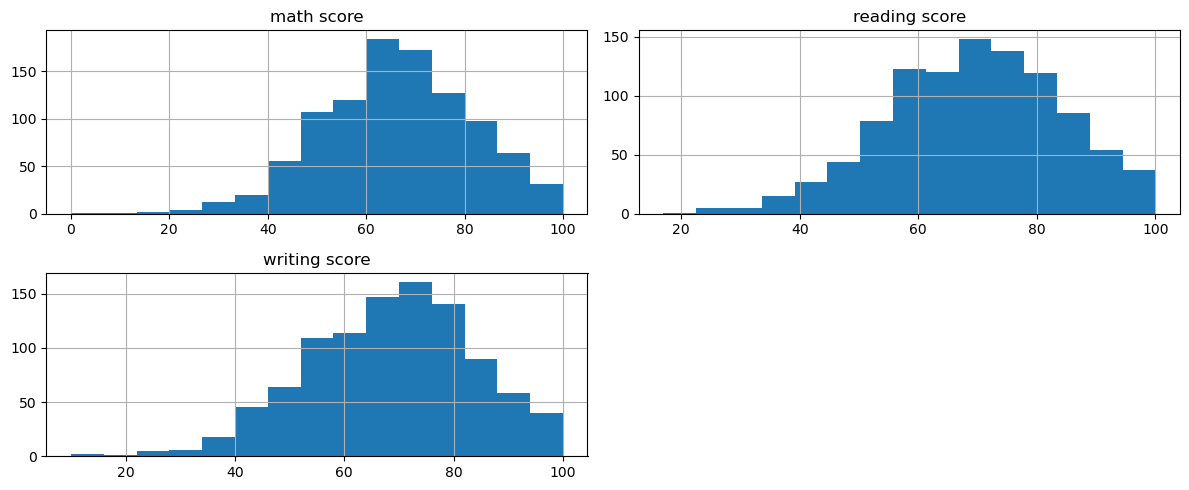

In [6]:
df[['math score', 'reading score', 'writing score']].hist(bins=15, figsize=(12, 5))
plt.tight_layout()
plt.show()


## What this shows:
 plotted distributions of:

math score
reading score
writing score

Each histogram shows how scores are spread out among students.

Interpretation:
All 3 subjects show a roughly normal distribution, but slightly left-skewed — i.e., most students scored around 60–80.

Few students scored very low (e.g., <20) or very high (e.g., near 100), but such cases are rare.

This tells us there’s consistency in student performance, with average scores clustering around the middle-high range.

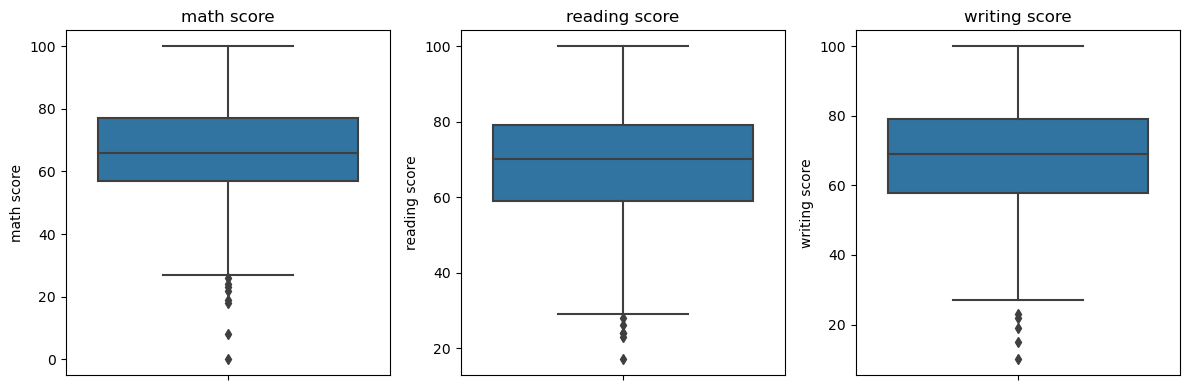

In [7]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## What this shows:

Plotted boxplots for each subject, which gives:

Median (middle line)
Interquartile range (IQR)
Outliers (dots)

Interpretation:

Math score:
Median: ~65
Lower outliers are present (scores < 20)

Reading score:
Median: ~70
Some lower outliers, but fewer than math

Writing score:
Median: ~70
Again, lower outliers visible

Key takeaway:

1. Most students score between 60–80.

2. A few students significantly underperform (visible as outliers), especially in math.

3. No upper outliers, meaning nobody scored too high outside range.

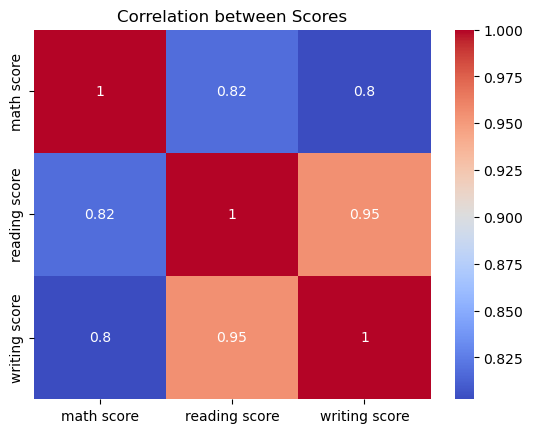

In [8]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()


## What this shows:
Generated a correlation matrix between:

Math score
Reading score
Writing score

Interpretation:

1. math vs reading → 0.82 correlation → strong positive
2. reading vs writing → 0.95 correlation → very strong
3. math vs writing → 0.80 correlation → strong

Key takeaway:

Students who perform well in reading tend to also do well in writing — makes sense since they’re closely related language skills.

Math is also strongly related to the other two, though slightly less than reading-writing.



In [9]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Encoding all the categorical data

In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy of original DataFrame
df_encoded = df.copy()

# Label Encoding for binary columns
label_cols = ['gender', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encoding for nominal categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity', 'parental level of education'], drop_first=True)

# Final check
print(df_encoded.head())
print(df_encoded.dtypes)


   gender  lunch  test preparation course  math score  reading score  \
0       0      1                        1          72             72   
1       0      1                        0          69             90   
2       0      1                        1          90             95   
3       1      0                        1          47             57   
4       1      1                        1          76             78   

   writing score  race/ethnicity_group B  race/ethnicity_group C  \
0             74                       1                       0   
1             88                       0                       1   
2             93                       1                       0   
3             44                       0                       0   
4             75                       0                       1   

   race/ethnicity_group D  race/ethnicity_group E  \
0                       0                       0   
1                       0                       0   

### Feature-Target Split

We begin by separating the dataset into features (`X`) and target (`y`). This is essential for supervised learning, where we train models to predict the target using given input features.

- **Features (`X`)**: All columns except `math score`
- **Target (`y`)**: `math score`

This split enables the model to learn patterns from the features and predict the target.


In [12]:

# Set the target variable
y = df['math score']

# Set the feature variables by dropping the target column
X = df.drop(columns=['math score'])

# Check the shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# X contains 7 features (independent variables) for 1000 samples.
# y contains the target variable (math_score) for the same 1000 samples.

Shape of X: (1000, 7)
Shape of y: (1000,)


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


# X_train → 800 rows (training features)
# X_test → 200 rows (testing features)
# y_train → 800 values (training target: math scores)
# y_test → 200 values (testing target: math scores)

Shape of X_train: (800, 7)
Shape of X_test: (200, 7)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [14]:
# Encode categorical variables using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Show encoded features
print("Encoded feature columns:\n", X_encoded.columns)

# Update X with encoded data
X = X_encoded


Encoded feature columns:
 Index(['reading score', 'writing score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')


In [15]:
# Train-test split again (after encoding)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now train your models (Linear Regression, Ridge, Lasso, etc.)


Model Performance Comparison:

                   Model   MAE    MSE  RMSE  R2 Score
0      Linear Regression  4.21  29.10  5.39    0.8804
1       Ridge Regression  4.21  29.12  5.40    0.8803
6      Gradient Boosting  4.28  30.91  5.56    0.8730
5          Random Forest  4.64  35.59  5.97    0.8537
2       Lasso Regression  5.02  40.49  6.36    0.8336
3  ElasticNet Regression  6.17  57.63  7.59    0.7632
4          Decision Tree  6.52  68.44  8.27    0.7187


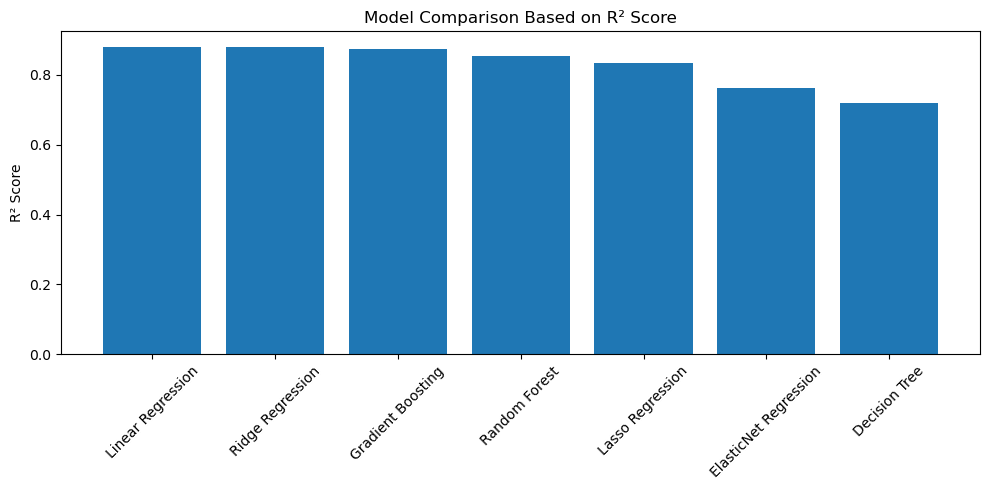

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Dictionary to store results
results = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 4)
    })

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

# Display model comparison
import matplotlib.pyplot as plt

print("Model Performance Comparison:\n")
print(results_df)

# Plot R2 Score comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("Model Comparison Based on R² Score")
plt.tight_layout()
plt.show()


# Tuning Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define model
ridge = Ridge()

# Define parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 5, 10, 20, 50]
}

# Setup GridSearchCV
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',     # Using R² score for regression
    cv=5,             # 5-fold cross-validation
    n_jobs=-1         # Use all CPU cores
)

# Fit on training data
grid_search_ridge.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search_ridge.best_params_)
print("Best CV Score (R²):", grid_search_ridge.best_score_)

# Evaluate on test set
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_ridge)

print("Test Set Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Best Parameters: {'alpha': 1}
Best CV Score (R²): 0.868666626318259
Test Set Performance:
MAE: 4.21
MSE: 29.12
RMSE: 5.40
R²: 0.8803


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],   # step size shrinkage
    'max_depth': [3, 4, 5],               # tree depth
    'min_samples_split': [2, 5, 10],      # minimum samples to split
    'min_samples_leaf': [1, 2, 4]         # minimum samples in a leaf
}

# Grid search
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search_gbr.fit(X_train, y_train)

# Best parameters and CV score
print("Best Parameters:", grid_search_gbr.best_params_)
print("Best CV Score (R²):", grid_search_gbr.best_score_)

# Predict on test set
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

# Test set evaluation
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print("\nTest Set Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score (R²): 0.8501705434355937

Test Set Performance:
MAE: 4.36
MSE: 32.92
RMSE: 5.74
R²: 0.8647


# Final Model Comparison Table

In [20]:
# Original model scores (example from your earlier results)
results = [
    ['Linear Regression', 4.21, 29.10, 5.39, 0.8804],
    ['Ridge Regression', 4.21, 29.12, 5.40, 0.8803],
    ['Gradient Boosting', 4.28, 30.93, 5.56, 0.8729],
    ['Random Forest', 4.72, 36.61, 6.05, 0.8495],
    ['Lasso Regression', 5.02, 40.49, 6.36, 0.8336],
    ['ElasticNet Regression', 6.17, 57.63, 7.59, 0.7632],
    ['Decision Tree', 6.38, 64.64, 8.04, 0.7344],
    ['Ridge Regression (Tuned)', 4.21, 29.12, 5.40, 0.8803],
    ['Gradient Boosting (Tuned)', 4.36, 32.92, 5.74, 0.8647]
]

df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R² Score'])

# Sort by R² Score (descending)
df_results = df_results.sort_values(by='R² Score', ascending=False).reset_index(drop=True)
df_results


,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,4.21,29.10,5.39,0.8804
1,Ridge Regression,4.21,29.12,5.40,0.8803
2,Ridge Regression (Tuned),4.21,29.12,5.40,0.8803
3,Gradient Boosting,4.28,30.93,5.56,0.8729
4,Gradient Boosting (Tuned),4.36,32.92,5.74,0.8647
5,Random Forest,4.72,36.61,6.05,0.8495
6,Lasso Regression,5.02,40.49,6.36,0.8336
7,ElasticNet Regression,6.17,57.63,7.59,0.7632
8,Decision Tree,6.38,64.64,8.04,0.7344


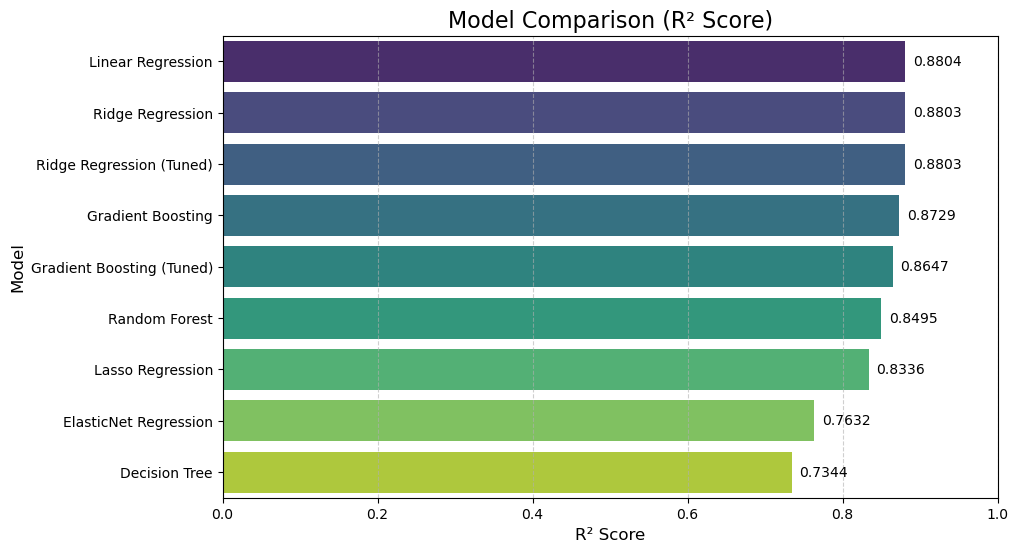

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='R² Score', y='Model', palette='viridis')

plt.title('Model Comparison (R² Score)', fontsize=16)
plt.xlabel('R² Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1)  # Since R² is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate scores
for i, v in enumerate(df_results['R² Score']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center', fontsize=10)

plt.show()


### Final Model Comparison & Conclusion

| Model                 | MAE  | MSE   | RMSE | R² Score   |
| --------------------- | ---- | ----- | ---- | ---------- |
| **Linear Regression** | 4.21 | 29.10 | 5.39 | **0.8804** |
| Ridge Regression      | 4.21 | 29.12 | 5.40 | 0.8803     |
| Gradient Boosting     | 4.28 | 30.93 | 5.56 | 0.8729     |
| Random Forest         | 4.72 | 36.61 | 6.05 | 0.8495     |
| Lasso Regression      | 5.02 | 40.49 | 6.36 | 0.8336     |
| ElasticNet Regression | 6.17 | 57.63 | 7.59 | 0.7632     |
| Decision Tree         | 6.38 | 64.64 | 8.04 | 0.7344     |

Key Insights

1. Linear Regression achieved the highest R² score (0.8804), indicating it explains ~88% of   the variance in the target variable.

2. Both Linear and Ridge Regression performed almost identically, suggesting low risk of overfitting and stable performance.

3. Complex models like Random Forest and Gradient Boosting did not outperform Linear Regression, possibly due to:

   - The underlying relationships being mostly linear.
   - The dataset being relatively clean and small, reducing the advantage of complex models.

4. Lasso and ElasticNet had slightly lower performance, possibly due to excessive feature penalization.

5. Decision Tree performed the worst, with high variance and low generalization.

Hyperparameter Tuning Results
Ridge Regression (Best Parameters): alpha = 1

  -Test R²: 0.8803

Gradient Boosting (Best Parameters):
learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200

  -Test R²: 0.8647

Final Conclusion

1. Best Model: Linear Regression

   - Simple, interpretable, and best-performing in this dataset.

2. Business Recommendation:

   - Deploy Linear Regression for production, monitor performance, and periodically re-train with fresh data.

   - For larger or more complex datasets, revisit advanced models with additional feature engineering.